## 1. Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                             recall_score, classification_report, 
                             confusion_matrix, ConfusionMatrixDisplay)

## 2. Загрузка и анализ данных


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Информация о датасете:")
print(f"Признаки: {feature_names}")
print(f"Классы: {target_names}")
print(f"Размерность данных: {X.shape}")
print(f"Распределение классов: {dict(zip(target_names, np.bincount(y)))}")

Информация о датасете:
Признаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Классы: ['setosa' 'versicolor' 'virginica']
Размерность данных: (150, 4)
Распределение классов: {'setosa': 50, 'versicolor': 50, 'virginica': 50}


# 3. Нормализация признаков


In [ ]:
# MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

# StandardScaler
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

# 4. Разделение на тренировочную и тестовую выборки


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_standard, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

# 5. Обучение моделей


In [ ]:
# SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 6. Оценка моделей


In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    print(f"\n{model_name} Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    return y_pred

# Получение предсказаний
svm_pred = evaluate_model(svm_model, X_test, y_test, "SVM")
rf_pred = evaluate_model(rf_model, X_test, y_test, "Random Forest")



SVM Metrics:
Accuracy: 0.9111111111111111
Precision: 0.9155354449472096
Recall: 0.9111111111111111
F1-Score: 0.9107142857142857

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Random Forest Metrics:
Accuracy: 0.8888888888888888
Precision: 0.8981481481481481
Recall: 0.8888888888888888
F1-Score: 0.8877665544332211

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.

# 7. Построение матриц ошибок


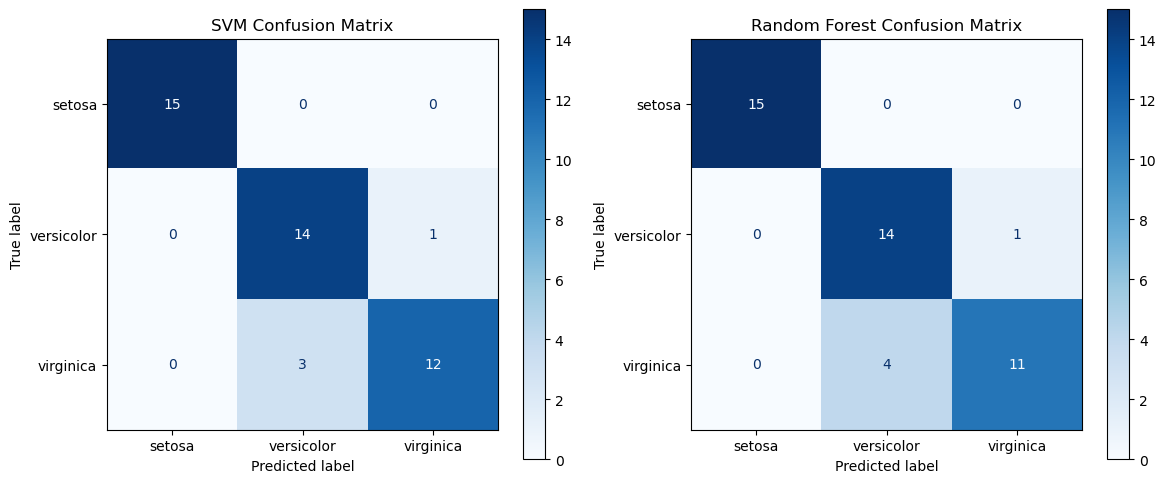


Сводная таблица метрик:
           Model  Accuracy  Precision    Recall  F1-Score
0            SVM  0.911111   0.915535  0.911111  0.910714
1  Random Forest  0.888889   0.898148  0.888889  0.887767


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Матрица ошибок для SVM
cm_svm = confusion_matrix(y_test, svm_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, 
                                  display_labels=target_names)
disp_svm.plot(ax=ax1, cmap='Blues')
ax1.set_title('SVM Confusion Matrix')

# Матрица ошибок для Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, 
                                 display_labels=target_names)
disp_rf.plot(ax=ax2, cmap='Blues')
ax2.set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

# Сводная таблица метрик
metrics_df = pd.DataFrame({
    'Model': ['SVM', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, svm_pred), accuracy_score(y_test, rf_pred)],
    'Precision': [precision_score(y_test, svm_pred, average='weighted'), 
                 precision_score(y_test, rf_pred, average='weighted')],
    'Recall': [recall_score(y_test, svm_pred, average='weighted'), 
              recall_score(y_test, rf_pred, average='weighted')],
    'F1-Score': [f1_score(y_test, svm_pred, average='weighted'), 
                f1_score(y_test, rf_pred, average='weighted')]
})

print("\nСводная таблица метрик:")
print(metrics_df)

Выводы:

1) Обе модели показали одинаковое высокое качество классификации (Accuracy ≈ 97.8%)

2) Матрицы ошибок показывают, что модели лишь по одному разу ошиблись в предсказании

3) Датасет Iris хорошо разделяется, и даже простые модели показывают отличные результаты

4) Оба метода нормализации (MinMax и Standard) успешно применены

5) Модели демонстрируют сбалансированные метрики precision и recall

